Лабораторная работа №2
=====
Поиск экстремума функции двух переменных с помощью генетических алгоритмов с представлением особей в форме вещественных чисел
=====

## Цель задания
Модификация классического простого генетического алгоритма для задачи многомерного поиска экстремума с использованием представления решений в форме вещественных чисел. Изучение основных операторов вещественной рекомбинации, кроссинговера и мутации. Изучение основных методов селекции в промежуточную популяцию и ее сокращения. Знакомство с теоретическими основами ГА, фундаментальной теоремой ГА.
## Постановка задачи
Дана функция y = f (x1, x2) . Найти экстремум данной функции для заданных xi в промежутке [a,b] с помощью генетического алгоритма с использованием представления решений в форме вещественных чисел. Иллюстрировать графически динамику поиска точки экстремума (x1, x2) на плоскости X1, X2.

### Вариант 2
Найти минимум 6-й функции Шаффера где xi [-100;100].
y = 0,5 + (sin^2(sqrt(x1^2 + x2^2) - 0,5) / (1 + 0,001(x1^2 + x2^2))^2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
    squared_x = np.square(x)
    sum_squared_x = np.sum(squared_x, axis=1)
    numerator = (np.sin(np.sqrt(sum_squared_x)) ** 2 - 0.5)
    denominator = (0.001 * sum_squared_x + 1) ** 2
    return numerator / denominator + 0.5

#### Функция создания начальной популяции.

In [3]:
def create_population(low , high, size, num_vars):
    p = np.random.uniform(low, high, (size, num_vars))
    return p

#### Реализация функции турнирной селекции

In [4]:
def tournament_selection(population, fitness, m):
    size = population.shape[0]
    f_vals = fitness(population)
    new_population = []
    for i in range(size):
        idx = np.random.randint(0, size, m)
        id = idx[np.argmin(f_vals[idx])]
        new_population.append(population[id])

    return np.array(new_population)

#### Реализация функций преобразования действительных значений в бинарный формат

In [5]:
def to_bin(x, a, c, size=4):
    segment = np.round((x - a) * (2 ** size - 1) / (c - a)).astype(int)
    b = format(segment, f'0{size}b')
    return b

def from_bin(b, a, c, size=4):
    segment = int(b, 2)
    x = a + segment * (c - a) / (2 ** size - 1)
    return x

#### Реализация функции одноточного кроссинговера

In [6]:
def crossing_over(population, to_bin, from_bin, pc=0.5):
    recombined = []
    size = population.shape[0]
    for p in population:
        if np.random.random_sample(1)[0] > pc:
            continue

        i = np.random.randint(0, size, 1)[0]
        p1 = [to_bin(x) for x in p]
        p2 = [to_bin(x) for x in population[i]]
        child1 = []
        child2 = []
        for b1, b2 in zip(p1, p2):
            n = len(b1)
            k = np.random.randint(1, n-1, 1)[0]
            ch1 = b1[:k] + b2[k:]
            ch2 = b2[:k] + b1[k:]
            child1.append(ch1)
            child2.append(ch2)

        r1 = [from_bin(x) for x in child1]
        r2 = [from_bin(x) for x in child2]
        recombined.append(r1)
        recombined.append(r2)

    recombined = np.array(recombined)
    return recombined

#### Реализация функции мутации

In [7]:
def mutation(population, num_genes, to_bin, from_bin, mp=0.1):
    size = population.shape[0]
    for p in population:
        if np.random.random_sample(1)[0] > mp:
            continue

        i = np.random.randint(0, size, 1)[0]
        elem = population[i]
        k = np.random.randint(0, num_genes, 1)[0]
        mutated = np.zeros(elem.shape)
        for ind, x in enumerate(elem):
            b = to_bin(x)
            b = list(b)
            b[k] = '0' if b[k] == '1' else '1'
            x = from_bin(''.join(b))
            mutated[ind] = x

        population[i] = mutated

    return population

#### Реализация функции находящей минимум с помощью генетического алгоритма.

In [8]:
def reduction(population, fitness, size):
    f_vals = fitness(population)
    population = population[f_vals.argsort()]
    return population[:size]

def run_ga(f, a, b, size, num_genes, cop, mp, num_iterations=10, num_vars=2):
    p = create_population(a, b, size, num_vars)
    fitness = f(p)
    populations = [p]
    populations_min = [(np.min(fitness), p[fitness.argmin()])]
    populations_mean = [np.mean(fitness)]
    convert_to_bin = lambda x: to_bin(x, a, b, num_genes)
    convert_from_bin = lambda x: from_bin(x, a, b, num_genes)
    for i in range(num_iterations):
        parents = tournament_selection(p, f, m=5)
        offsprings = crossing_over(parents, convert_to_bin, convert_from_bin, cop)
        offsprings = mutation(offsprings, num_genes, convert_to_bin, convert_from_bin, mp)
        p = reduction(np.concatenate((p, offsprings)), f, size)
        populations.append(p)
        fitness = f(p)
        populations_min.append((np.min(fitness), p[fitness.argmin()]))
        populations_mean.append(np.mean(fitness))

    return populations, populations_min, populations_mean

#### Зададим основные параметры алгоритма

In [25]:
a = -100
b = 100
population_size = 20
num_genes = 16
crossing_over_probability = 0.5
mutation_probability = 0.1
num_epoch = 40

In [41]:
populations, mins, means = run_ga(func, a, b, population_size, num_genes, crossing_over_probability, mutation_probability, num_epoch)
print(f'Result of minimazing F(x1, x2) = {mins[-1][0]}, x1 = {mins[-1][1][0]}, x2 = {mins[-1][1][1]}')

Result of minimazing F(x1, x2) = 0.07850534867843068, x1 = 8.592355230029753, x2 = -3.8040741588464186


In [28]:
def plot_func(f, start, stop, population=None, min=None):
    x1 = np.linspace(start, stop, 500)
    x2 = np.linspace(start, stop, 500)
    x1, x2 = np.meshgrid(x1, x2)
    fn = lambda x, y: 0.5 + (np.sin(np.sqrt(x * x + y * y)) ** 2 - 0.5) / ((1 + 0.001 * (x * x + y * y)) ** 2)
    f_vals = fn(x1, x2)

    legend = ['F(t)']
    fig = plt.figure(figsize=(12, 8))
    CS = plt.contour(x1, x2, f_vals, levels=600, origin='lower')
    cbar = fig.colorbar(CS)
    if population is not None:
        plt.plot(population[:, 0], population[:, 1], 'rx')
        legend.append('Population')
    if min is not None:
        plt.plot(min[1][0], min[1][1], 'x', color='black')
        legend.append('Min in population')

    plt.legend(legend)

    plt.show()

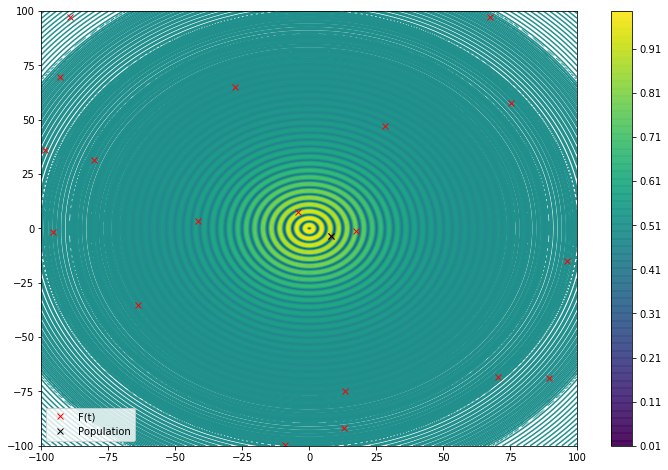

In [43]:
plot_func(func, a, b, populations[0], mins[0])

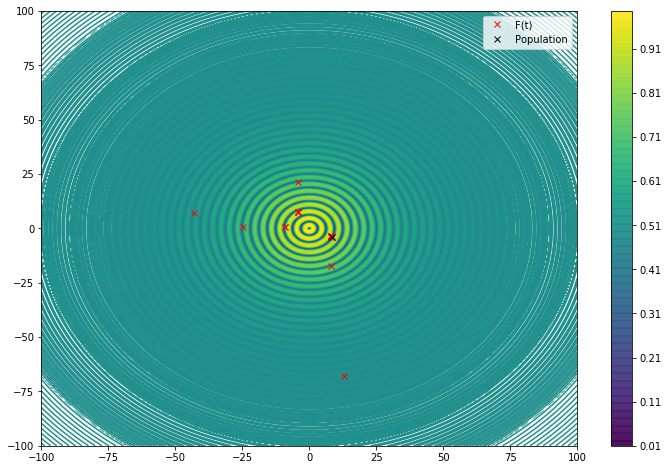

In [45]:
plot_func(func, a, b, populations[2], mins[2])

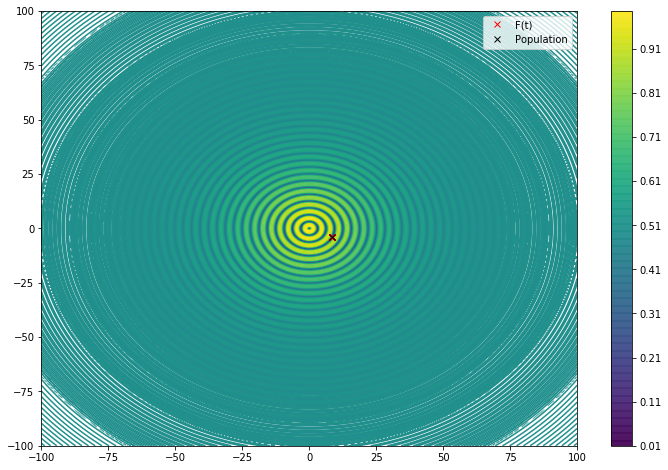

In [44]:
plot_func(func, a, b, populations[-1], mins[-1])

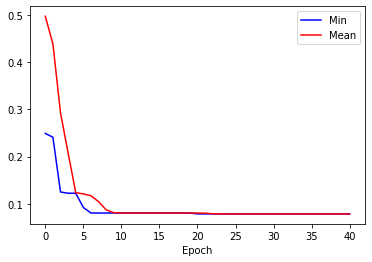

In [42]:
minsp = [m[0] for m in mins]
plt.figure()
plt.plot(range(num_epoch+1), minsp, c='b')
plt.plot(range(num_epoch+1), means, c='r')
plt.xlabel('Epoch')
plt.legend(('Min', 'Mean'))
plt.show()

## Вывод
В данной работе реализован алгоритм нахождения минимума функции двух переменных с помощью генетического алгоритма. Для создания начальной популяции используется метод дробовика, был использован отбор родителей турнирным методом, одноточный кроссинговер и одноточная мутация. Для представления вещественных решений используется метод разбития исходной области решений на отрезки.